<a href="https://colab.research.google.com/github/rHarris4080/thinkful_25.6_assignment/blob/main/25_6_Assignment_GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#25.6 Assignment - Rob Harris
##Gaussian Mixture Method (GMM) - Clustering 
###In this assignment, you'll continue working with the heart disease dataset from the UC Irvine Machine Learning Repository.

1. Apply GMM to the heart disease dataset by setting n_components=2. Get ARI and silhouette scores for your solution and compare it with those of the k-means and hierarchical clustering solutions that you implemented in the previous checkpoint assignments. Which algorithm performs best?
2. GMM implementation of scikit-learn has a parameter called covariance_type. This parameter determines the type of covariance parameters to use. There are four types that you can specify:


*   full: This is the default. Each component has its own general covariance matrix
*   tied: All components share the same general covariance matrix.
diag: Each component has its own diagonal covariance matrix.
*   diag: Each component has its own diagonal covariance matrix.
*   spherical: Each component has its own single variance.

Try all of these. Which one performs best in terms of ARI and silhouette scores?





###Load libraries and establish connection:

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

from sqlalchemy import create_engine
import warnings
warnings.filterwarnings("ignore")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

###Preprocessing:

In [ ]:
# Make sure the number of rows divides evenly into four samples.  Thx Ex.
rows = heartdisease_df.shape[0] - heartdisease_df.shape[0] % 2
df = heartdisease_df.iloc[:rows, :]

# Break into a set of features and a variable for the known outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace some random string values.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)


###Standardize features and run the GMM model:

In [ ]:
# Standarizing the features
X_std = StandardScaler().fit_transform(X)

# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

##1. Apply GMM to the heart disease dataset by setting n_components=2. Get ARI and silhouette scores for your solution and compare it with those of the k-means and hierarchical clustering solutions that you implemented in the previous checkpoint assignments. Which algorithm performs best?

###Visualize GMM clustering:

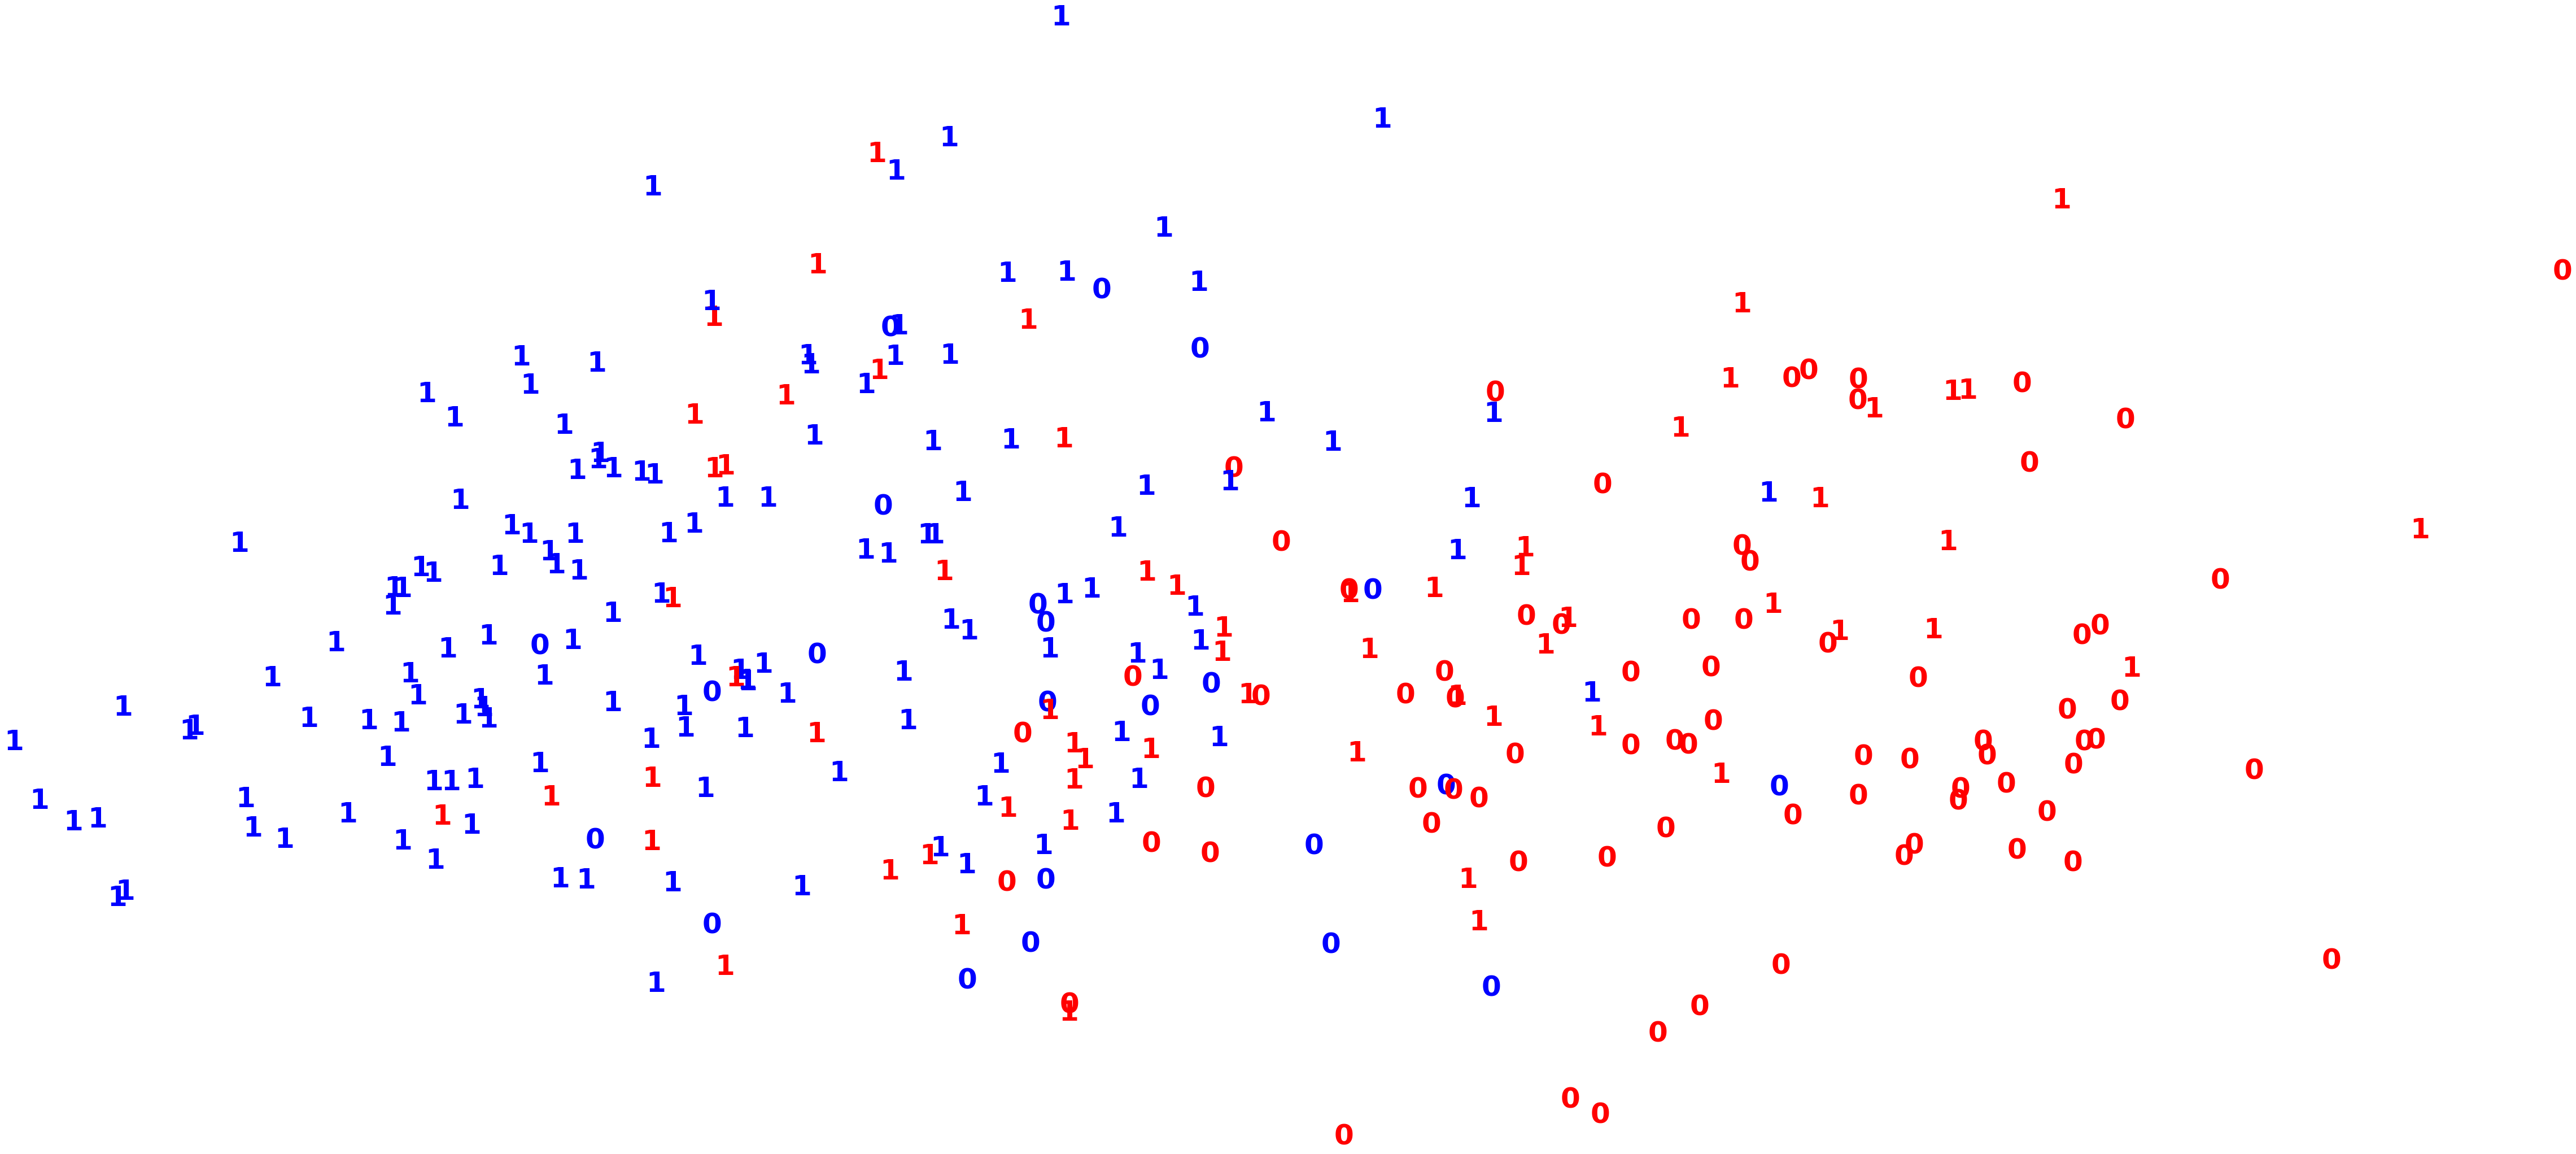

In [ ]:

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
print("ARI: GMM score:\t\t", metrics.adjusted_rand_score(y, clusters))
print("Silhoutte: GMM score:\t", metrics.silhouette_score(X_std, clusters, metric='euclidean'))

ARI: GMM score:		 0.18230716541111341
Silhoutte: GMM score:	 0.13560123273712885


### ARI and silhouette scores from 25.4 Agglomerative hierarchical clustering (linkage ='average'):

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg_cluster_ave = AgglomerativeClustering(linkage='average', affinity='cosine', n_clusters=2)
clusters_ave = agg_cluster_ave.fit_predict(X_std)

print("ARI: hierarchical score:\t", metrics.adjusted_rand_score(y, clusters_ave))
print("Silhouette: hierarchical score:\t", metrics.silhouette_score(X_std, clusters_ave, metric='euclidean'))

ARI: hierarchical score:	 0.29242115793299467
Silhouette: hierarchical score:	 0.14746387683622914


### ARI and silhouette scores from 25.2 K-means clustering:

In [ ]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
print("ARI: k-means score:\t\t", metrics.adjusted_rand_score(y, k_means))
print("Silhoutte: k-means score:\t", metrics.silhouette_score(X_std, k_means, metric='euclidean'))


ARI: k-means score:		 0.43661540614807665
Silhoutte: k-means score:	 0.17440650461256255


###The original k-means ARI and Silhouette scores both outperform both hierarchical and GMM clustering respective scores.

##2. GMM implementation of scikit-learn has a parameter called covariance_type. This parameter determines the type of covariance parameters to use. There are four types that you can specify:


*   full: This is the default. Each component has its own general covariance matrix
*   tied: All components share the same general covariance matrix.
diag: Each component has its own diagonal covariance matrix.
*   diag: Each component has its own diagonal covariance matrix.
*   spherical: Each component has its own single variance.

###Try all of these. Which one performs best in terms of ARI and silhouette scores?

In [ ]:
cov_t = ['full', 'tied', 'diag', 'spherical']

for cov_p in cov_t:
  gmm_cluster = GaussianMixture(n_components=2, covariance_type = cov_p, random_state=123)
  clusters = gmm_cluster.fit_predict(X_std)

  print("ARI: GMM score (covariance_type='", cov_p, "'):\t\t", metrics.adjusted_rand_score(y, clusters))
  print("Silhoutte: GMM score (covariance_type='", cov_p, "'):\t", metrics.silhouette_score(X_std, clusters, metric='euclidean'),"\n")

ARI: GMM score (covariance_type=' full '):		 0.18230716541111341
Silhoutte: GMM score (covariance_type=' full '):	 0.13560123273712885 

ARI: GMM score (covariance_type=' tied '):		 0.18230716541111341
Silhoutte: GMM score (covariance_type=' tied '):	 0.13560123273712885 

ARI: GMM score (covariance_type=' diag '):		 0.18230716541111341
Silhoutte: GMM score (covariance_type=' diag '):	 0.13560123273712885 

ARI: GMM score (covariance_type=' spherical '):		 0.19406285999485062
Silhoutte: GMM score (covariance_type=' spherical '):	 0.12371711478343662 



###The only covarience_type that differed was 'spherical'.  A spherical covariance type increased the ARI score slightly while it's corresponding Silhouette score was lower than the other 3.